In [1]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


# Wie skaliert eigentlich das ganze?

## Machine Learning Daten skalieren

Nun, da wir in der Lage sind, unsere Rohdaten zu laden und analysieren, können wir zum nächsten großen Schritt der Datenvorverarbeitung übergehen, dem Skalieren von Daten. Viele Machine-Learning Algorithmen erwarten skalierte Eingangsdaten. In diesem Kapitel werden wir lernen, wie Daten normalisiert und standardisiert werden können und wie wir entscheiden können, welches Verfahren das richtige ist. Dies ist vor allem für künstliche Neuronale Netze sowie Deep Learning wichtig.

### Daten normalisieren

Der Begriff Normalisieren sollte bereits aus der Mathematik bekannt sein. Dabei werden die Werte so angepasst, dass sie sich auf einer Skala zwischen 0 und 1 bewegen. Dazu brauchen wir den maximalen und den minimalen Wert jedes Attributs die wir durch einfaches Iterieren über die Werte finden können.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.1:</b> Schreiben Sie eine Funktion <code>dataset_minmax()</code>, die das Minimum und Maximum jedes Attributs findet.
<ul>
    <li> Hinweis: Die Funktion hat den Datensatz als Eingangsvariable und gibt eine Liste an Tupeln (Min, Max) für jede Spalte zurück.

</ul>
</div>

In [2]:
# DO NOT change this cell
from pandas import read_csv
import pandas as pd

filename = 'data/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)


In [3]:
# Find the min and max values for each column
def dataset_minmax(dataset: pd.DataFrame):
    z,s=dataset.shape
    ### STUDENT CODE HERE
    minmax=[]
    for i in range(s):
        name=dataset.columns[i]
        minmax.append(tuple([min(dataset[name]),max(dataset[name])]))
    ### STUDENT CODE until HERE
    return minmax

# small test dataset
dataset = pd.DataFrame({'First' : [50, 30], 'Second' : [20, 90]})
print(dataset)

# Calculate min and max for each column
minmax = dataset_minmax(dataset)
print(minmax)

   First  Second
0     50      20
1     30      90
[(30, 50), (20, 90)]


Jetzt sind wir in der Lage, das Minimum und das Maximum jeder Spalte zu finden. Mit Hilfe dieser Werte und der folgenden Formel können wir dann unsere Werte normalisieren. 

$$scaled\, value = \frac{value - min}{max-min}$$

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.2:</b> Implementieren Sie diese Formel in der Funktion <code>normalize_dataset()</code>.
<ul>
    <li> Hinweis: Die Funktion hat den Datensatz und die Min-Max Werte als Eingangsvariablen und gibt den normalisierten Datensatz zurück.

</ul>
</div>

In [4]:
def normalize_dataset1(dataset: pd.DataFrame, minmax: list):
    
    return_dataset = dataset.copy(deep=True)
    
    ### STUDENT CODE HERE
    z,s=dataset.shape
    for i in range(s):
        name=dataset.columns[i]
        min1=minmax[i][0]
        max1=minmax[i][1]
        return_dataset[name]=(return_dataset[name]-min1)/(max1-min1)
        print(return_dataset)
    ### STUDENT CODE until HERE
            
    return return_dataset
def normalize_dataset(dataset: pd.DataFrame, minmax: list):
    
    return_dataset = dataset.copy(deep=True)
    
    ### STUDENT CODE HERE
    z,s=dataset.shape
    for i in range(s):
        name=dataset.columns[i]
        min1=minmax[i][0]
        max1=minmax[i][1]
        return_dataset[name]=(return_dataset[name]-min1)/(max1-min1)
        # print(return_dataset)
    ### STUDENT CODE until HERE
            
    return return_dataset
# normalize_dataset(dataset,minmax)

Wenn wir nun die gerade implementierten Funktionen kombinieren, können wir unseren Datensatz problemlos normalisieren. 

In [5]:
# Again a small test dataset
dataset =  pd.DataFrame({'First' : [50, 30], 'Second' : [20, 90], 'Third' : [30, 40]})
print(dataset)

# Calculate min and max for each column
minmax = dataset_minmax(dataset)
print(minmax)

# Normalize columns
dataset = normalize_dataset(dataset, minmax)
print(dataset)

   First  Second  Third
0     50      20     30
1     30      90     40
[(30, 50), (20, 90), (30, 40)]
   First  Second  Third
0    1.0     0.0    0.0
1    0.0     1.0    1.0


Jetzt müssen wir nur noch alles zusammensetzten.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.3:</b> Implementieren Sie die Funktion <code>load_normalized_csv()</code>, die eine CSV Datei lädt und die Daten anschließend normalisiert. Gehen Sie davon aus, dass keine Header-Informationen vorhanden sind.
</div>

In [6]:
def load_normalized_csv(filename: str):
    
    ### STUDENT CODE HERE
    df=pd.read_csv(filename)
    minmax=dataset_minmax(df)
    df_new=normalize_dataset(df,minmax)
    return df_new
    ### STUDENT CODE until HERE

## Test:
filename = 'data/pima-indians-diabetes.csv'

dataset = load_normalized_csv(filename)

print(dataset)

            6       148        72        35         0      33.6     0.627  \
0    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
1    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
2    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
3    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
4    0.294118  0.582915  0.606557  0.000000  0.000000  0.381520  0.052519   
..        ...       ...       ...       ...       ...       ...       ...   
762  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
763  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
764  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
765  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
766  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

           50    1  
0    0.166667  0.0  
1    0.183333  1.0  
2    0.00000

### Standardize data

Beim Standardisieren zentriert man seine Verteilung um 0 und setzt die Standardabweichung auf 1. Dadurch ergibt sich eine Gaußsche Normalverteilung, auch bekannt als Glockenkurve.

Um standardisieren zu können, benötigen wir den Mittelwert und die Standardabweichung jeder Spalte unseres Datensets. Daher werden wir nun zunächst eine Funktion schreiben, die den Mittelwert jeder Spalte mit Hilfe der folgenden Formel berechnet:

$$\bar{x} = \frac{\sum_{n=0}^{N-1} x_n}{N}$$


<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.4:</b> Schreiben Sie die Funktion <code>column_means()</code>, die den Mittelwert für jede Spalte im Datensatz zurückgibt.
</div>

In [7]:
def column_means(dataset: pd.DataFrame):
    
    ### STUDENT CODE HERE
    z,s=dataset.shape
    means=[]
    for i in range(s):
        name=dataset.columns[i]
        means.append(sum(dataset[name])/z)
    ### STUDENT CODE until HERE
    
    return means

Wie wahrscheinlich bereits aus der Wahrscheinlichkeitstheorie bekannt, beschreibt die empirische Standardabweichung die durchschnittliche Streuung der Werte um den Mittelwert. Die nachfolgende Formel soll dabei helfen, eine Funktion zu schreiben, die die Standardabweichung berechnet.


$$ s = \sqrt{\frac{\sum\nolimits_{n=0}^{N-1}(x_n - \bar{x})^2}{N}}$$


<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.5:</b> Schreiben Sie eine Funktion <code>column_stdevs()</code>, die für jede Spalte die Standardabweichung mit der gegebenen Formel berechnet und in einer Liste zurückgibt.
</div>

In [8]:
from math import sqrt

def column_stdevs(dataset: pd.DataFrame, means: list):
    
    ### STUDENT CODE HERE
    z,s=dataset.shape
    stds=[]
    means=column_means(dataset)

    for i in range(s):
        name=dataset.columns[i]

        stds.append(sqrt(sum((dataset[name]-means[i])**2)/z))
        
    ### STUDENT CODE until HERE
        
    return stds

Jetzt können wir unsere Mittelwert und Standardabweichung Funktionen mit einem kleinen Beispiel testen.

In [9]:
dataset = pd.DataFrame({'First' : [50, 30], 'Second' : [20, 90], 'Third' : [30, 50]})
print(dataset)
      
means = column_means(dataset)
print(means)
      
stdevs = column_stdevs(dataset, means)
print(stdevs)

   First  Second  Third
0     50      20     30
1     30      90     50
[40.0, 55.0, 40.0]
[10.0, 35.0, 10.0]


Wir haben nun alle Tools, um unsere Daten standardisieren zu können.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.6:</b> Implementieren Sie die Funktion <code>standardize_dataset()</code>, die die Werte im Datensatz standardisiert.
</div>

In [14]:
def standardize_dataset(dataset: pd.DataFrame, means: list, stdevs: list):
    return_dataset = dataset.copy(deep=True)
    z,s=dataset.shape
    ### STUDENT CODE HERE
    for i in range(s):
        name=dataset.columns[i]
        return_dataset[name]=(return_dataset[name]-means[i])/stdevs[i]

    ### STUDENT CODE until HERE
    
    return return_dataset

Jetzt ist es an der Zeit, alles zusammen zu setzten und die Standardisierungsfunktion zu testen.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.7:</b> Führen Sie alle benötigten Funktionen aus und geben Sie die Daten in einem Histogramm aus.
</div>

   First  Second  Third
0     50      20     30
1     10      25     40
2     30      90     50
      First    Second     Third
0  1.224745 -0.784063 -1.224745
1 -1.224745 -0.627250  0.000000
2  0.000000  1.411313  1.224745


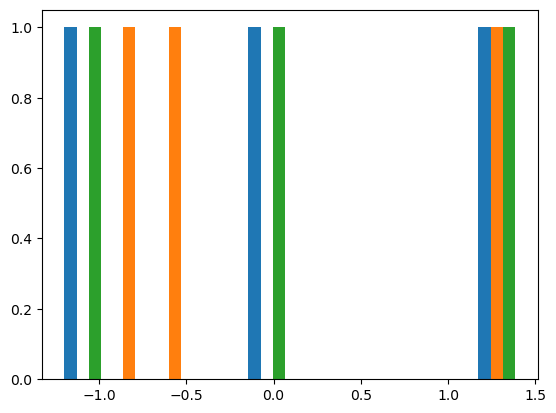

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.DataFrame({'First' : [50, 10, 30], 'Second' : [20, 25, 90], 'Third' : [30, 40, 50]})
print(dataset)

### STUDENT CODE HERE
means=column_means(dataset)
stds=column_stdevs(dataset,means)
standardized_dataset=standardize_dataset(dataset,means,stds)
print(standardized_dataset)
plt.hist(standardized_dataset)
plt.show()
### STUDENT CODE until HERE


Lass uns nun eine Funktion schreiben, die eine CSV Datei einließt und standardisiert.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.8:</b> Vervollständigen Sie die <code>load_standardized_csv()</code> Funktion, die eine Datei einliest und den standardisierten Datensatz zurückgibt.
</div>



In [16]:
def load_standardized_csv(filename: str):
    
    ### STUDENT CODE HERE
    df=pd.read_csv(filename)
    means=column_means(df)
    stds=column_stdevs(df,means)
    standardized_dataset=standardize_dataset(df,means,stds)
    ### STUDENT CODE until HERE
    return standardized_dataset

## Test:
filename = 'data/pima-indians-diabetes.csv'

dataset = load_standardized_csv(filename)

print(dataset.head())

          6       148        72        35         0      33.6     0.627  \
0 -0.843726 -1.122086 -0.160249  0.532023 -0.693559 -0.683729 -0.364265   
1  1.234240  1.944476 -0.263578 -1.286882 -0.693559 -1.102301  0.604701   
2 -0.843726 -0.996920 -0.160249  0.155698  0.122357 -0.493469 -0.919684   
3 -1.140579  0.505069 -1.503534  0.908349  0.764674  1.409132  5.482732   
4  0.343683 -0.152051  0.253070 -1.286882 -0.693559 -0.810569 -0.817052   

         50         1  
0 -0.188940 -0.730753  
1 -0.103795  1.368451  
2 -1.040393 -0.730753  
3 -0.018650  1.368451  
4 -0.274086 -0.730753  


### Wann normalisieren und wann standardisieren?

Neben den beiden vorgestellten Methoden gibt es viele weitere Arten der Datentransformation. 
Allgemein zielen diese Transformation immer darauf ab, Strukturen der Daten bestmöglich für den Lernalgorithmus offen zu legen. 
Die passende Transformationsmethode ist vom Anwendungsfall abhängig, sodass es im Allgemeinen nicht möglich ist, eine bestimmte Transformationsmethode einem bestimmten maschinellen Lernalgorithmus zuzuordnen.
Manchmal ist allerdings nicht offensichtlich, welcher Transformationstyp der beste ist. In solch einem Fall muss man ausprobieren, welcher Algorithmus der passendste ist („Trial and Error“).

## Daten für Machine-Learning vorbereiten

Dies ist das letzte Kapitel zur Datenvorverarbeitung. Wie wir im vorangegangenen Kapitel gelernt haben, ist es sinnvoll, seine Daten zu verarbeiten und somit ihre besondere Struktur offenlegen. Dazu haben wir ein einfaches Python Programm geschrieben. Nun gehen wir noch einen Schritt weiter, in dem wir das Paket _scikit-learn_ verwenden. Nach dieser Aufgabe werden wir in der Lage sein, Daten zu normalisieren, standardisieren und binarisieren. 

Die scikit-learn Library enthält zwei verschiedene Standardwege, um Daten zu ztansformieren.

<div class="alert alert-block alert-success">
<b>Frage 1.4.9:</b> Recherchiere und beschreibe die Unterschiede.
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b>Standardscaler und Minmaxscaler</div>


### Daten Normalisieren

Beim Normalisieren eines Datensatzes wird der größte Wert 1. Das ist hilfreich bei Datensätzen, die viele Nullen und unterschiedliche Skalen aufweisen. 

Mit Hilfe von scikit-learn können Daten mit der `MinMaxScaler` Klasse normalisiert werden.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.10:</b> Min-Max-Normalisieren Sie die Daten aus dem Diabetes-Beispiel mit scikit-learn, indem Sie den <code>MinMaxScaler</code> verwenden, und speichern Sie sie in der Variable <code>dataframe_normalized</code>.
</div>

In [28]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

filename = 'data/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### STUDENT CODE HERE
scaler=MinMaxScaler()

dataframe_normalized=pd.DataFrame(scaler.fit_transform(pd.read_csv(filename)),columns=names)
### STUDENT CODE until HERE

dataframe_normalized.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0


### Daten Standardisieren

Eine weitere Möglichkeit ist die Standardisierung Ihrer Daten, die auch als z-Transformation bezeichnet wird. Das Ergebnis einer Standardisierung ist eine Verteilung mit einem Mittelwert von Null und einer Standardabweichung von 1.

Sie können Daten standardisieren, indem Sie die Klasse `StandardScaler` in scikit-learn verwenden.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.11:</b> Standardisieren Sie die Daten des Diabetes-Beispiel mit dem <code>StandardScaler</code> und speichern Sie diese in der Variablen <code>dataframe_standardized</code>
</div>

In [30]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

filename = 'data/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### STUDENT CODE HERE
scaler=StandardScaler()
dataframe_standardized=pd.DataFrame(scaler.fit_transform(pd.read_csv(filename)),columns=names)
### STUDENT CODE until HERE
dataframe_standardized.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940,-0.730753
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795,1.368451
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393,-0.730753
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650,1.368451
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086,-0.730753


### Daten Binarisieren
Eine neue Methode der Datenvorverarbeitung ist die Binarisierung (Engl.: binarization). Hierbei wird ein Schwellenwert festgelegt. Alle Werte über der Schwelle werden zu eins, alle darunter zu null.
In scikit-learn kann dies mit Hilfe der Klasse `Binarizer` erreicht werden.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.12:</b> 
    Binarisieren Sie das Diabetes-Beispiel mit einem Schwellenwert von 0,0 und speichern Sie die binarisierten Daten in der Variablen <code>dataframe_binarized</code>
</div>

In [32]:
from sklearn.preprocessing import Binarizer
from pandas import read_csv

filename = 'data/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### STUDENT CODE HERE
scaler=Binarizer(threshold=0.0)
dataframe_binarized=pd.DataFrame(scaler.fit_transform(pd.read_csv(filename)),columns=names)
### STUDENT CODE until HERE
dataframe_binarized.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


## Zusammenfassung

In diesem Abschnitt haben wir gelernt, wie man Daten richtig einließt, versteht und vorverarbeitet. Dies ist von hoher Relevanz für die Anwendung von Daten auf Machine-Learning Algorithmen, da die Performanz solcher Algorithmen maßgeblich von der Qualität der verwendeten Daten abhängt.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.4.13:</b> 
    <ul>
        <li>Fassen Sie in drei bis fünf Sätzen zusammen, welche Methoden Sie heute gelernt haben
        <li>Treffen Sie zwei Aussagen über den Datensatz, z. B. je mehr Kinder eine Person hat, desto älter ist die Person im Durchschnitt.
        <li>Sie können auch einige Plots oder Ausgaben verwenden, wenn Sie dies wünschen.
    </ul>
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>







